In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 26 17:26:10 2020
@author: Rai Kanwar Taimoor
@adapted by Wenhan Yang on Wed May 5 2020
"""

import numpy as np
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

def to_lower(arr):
    for i in range(0,len(arr)):
        arr[i] = arr[i].lower()
    return arr
def Result_Table(table_col1, table_col2):
    table = PrettyTable()
    table.add_column("Actual Label", table_col1)
    table.add_column("Predicted Value", table_col2)
    return table
def get_pc(raw_matrix, pca):
    #PCA to get the principle component(a vector)
    pc = pca.fit_transform(raw_matrix)
    explained_variane = pca.explained_variance_ratio_
    return pc, explained_variane
def attach(mat1,mat2):
    mat2 = np.reshape(mat2,(1,(len(mat2)*len(mat2[0])*len(mat2[0][0]))))
    if (type(mat1) != np.ndarray):
        mat1 = np.array(mat1)
        mat1 = mat2
    else:
        mat1 = np.append(mat1, mat2, axis=0)
    return mat1
def get_pic_matrix(input_data, filepath):
    #initialize a new array to hold vectorized pics
    input_pics = []
    #two new list to record imgs' idx where they fail to open or process
    idx_exception = []
    #transfrom the corresponding pictures into matrices, then vectors.
    #for train_pics in X_train:
    for i in range(0, len(input_data)):
        try:
            image = img.imread(filepath + input_data[i])
        except:
            #record "throw-away" pics' idx
            idx_exception.append(i)
            continue
        input_pics = attach(input_pics,image)
        #img_vector, explained_variane = get_pc(image,pca)
    return input_pics, idx_exception

In [8]:
# Initialization
my_data = pd.read_csv('facial_expressions-master/data/legend.csv').values
X_data = my_data[0:2000, 1]
y_data = my_data[0:2000, 2]
y_data = to_lower(y_data)

# Spiliting Data 67-33 ratio as said by sir
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.33,random_state=0)

In [9]:
my_path = "facial_expressions-master/resized_images/"
X_train_pics, idx_train_exception = get_pic_matrix(X_train, my_path)
X_test_pics, idx_test_exception = get_pic_matrix(X_test, my_path)
#throw away unprocessable imgs' idx for y data
y_train = np.delete(y_train,idx_train_exception,axis = 0)
y_test = np.delete(y_test,idx_test_exception,axis = 0)
#convert X_data to ndarray
X_train_pics = np.array(X_train_pics)
X_test_pics = np.array(X_test_pics)
X_train_pics, X_test_pics = X_train_pics / 255.0, X_test_pics / 255.0
# X_train_pics = X_train_pics.reshape((len(X_train_pics),len(X_train_pics[0])))
# X_test_pics = X_test_pics.reshape((len(X_test_pics),len(X_test_pics[0])))

In [10]:
pca = PCA(n_components=3)

feat_cols = [ 'pixel'+str(i) for i in range(X_train_pics.shape[1])]
df = pd.DataFrame(X_train_pics,columns=feat_cols)
df['y'] = y_train
df['label'] = df['y'].apply(lambda i: str(i))

pca_result = pca.fit_transform(X_train_pics)

In [11]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.19123156 0.12655147 0.11581955]


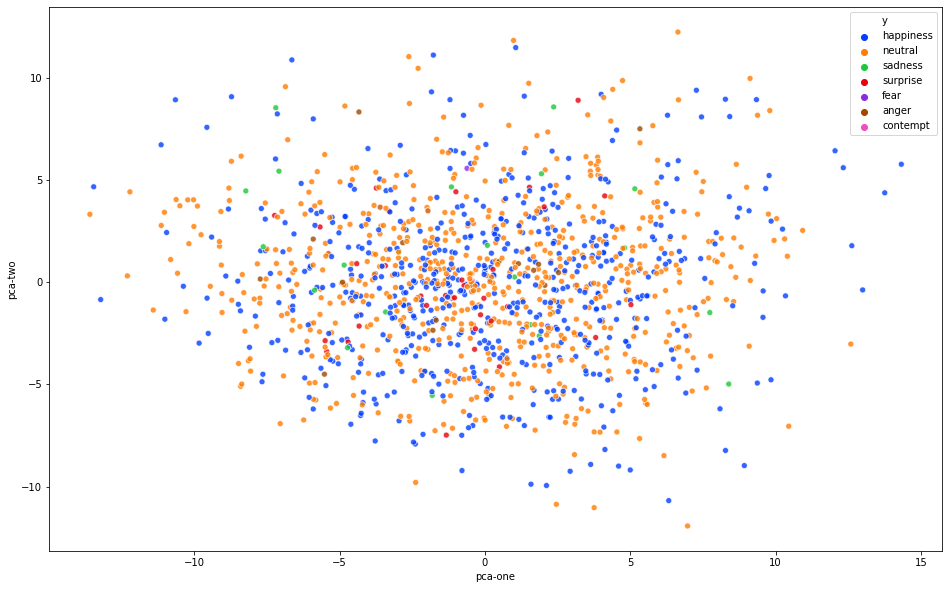

In [12]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
plt.figure(figsize=(16,10))
# fig = plt.figure()
# ax = fig.add_subplot(111, projection = '3d')
# ax.scatter(df['pca-one'],df['pca-two'],df['pca-three'],sns.color_palette("bright", len(np.unique(y_train))))
# plt.show()
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("bright", len(np.unique(y_train))),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.8
)